In [184]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')
# I have already created a customer_profile.csv file for customer profile which i am going to use directly here. It is already normalized.
customer_profile = pd.read_csv('customer_profile.csv')

In [185]:
customer_profile.drop(columns=['CustomerID', 'CustomerName', 'SignupDate'], inplace=True)
customer_profile.head()

,TotalSpent,AvgOrderValue,TotalOrders,UniqueProducts,TotalQuantity,Region_Asia,Region_Europe,Region_North America,Region_South America
0,-0.061701,-0.070263,-0.011458,0.050047,-0.122033,0,0,0,1
1,-0.877744,-0.934933,-0.467494,-0.424204,-0.448000,1,0,0,0
2,-0.405857,-0.026271,-0.467494,-0.424204,0.203934,0,0,0,1
3,1.032547,-0.076769,1.356650,1.472798,1.670787,0,0,0,1
4,-0.783929,-0.040028,-0.923530,-0.898455,-0.936951,1,0,0,0


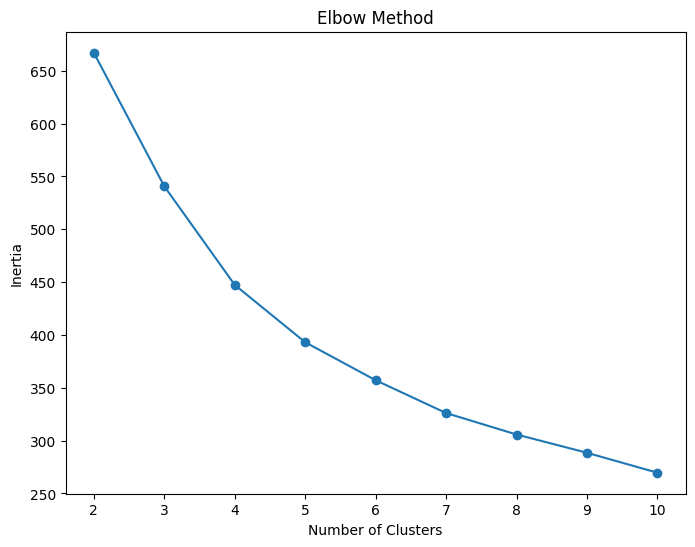

In [186]:
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_profile)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [165]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

k_values = [4, 5, 6]
clustering_results = []

for k in k_values:
    print(f"\nk = {k}")
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    customer_profile['Cluster'] = kmeans.fit_predict(customer_profile)
    
    silhouette_avg = silhouette_score(customer_profile, customer_profile['Cluster'])
    db_index = davies_bouldin_score(customer_profile, customer_profile['Cluster'])
    
    print(f"Silhouette Score: {silhouette_avg:.4f}")
    print(f"DB Index: {db_index:.4f}")
    
    clustering_results.append({
        'k': k,
        'Silhouette Score': silhouette_avg,
        'DB Index': db_index
    })



k = 4
Silhouette Score: 0.3137
DB Index: 1.2498

k = 5
Silhouette Score: 0.4219
DB Index: 0.8929

k = 6
Silhouette Score: 0.3762
DB Index: 1.0339


In [187]:
# fit k-means model
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_profile['Cluster'] = kmeans.fit_predict(customer_profile)

In [188]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(customer_profile, customer_profile['Cluster'])
print("DB Index:", db_index)

DB Index: 0.9686940685415151


In [189]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(customer_profile, customer_profile['Cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3927297140910095


In [190]:
customer_profile.head()

,TotalSpent,AvgOrderValue,TotalOrders,UniqueProducts,TotalQuantity,Region_Asia,Region_Europe,Region_North America,Region_South America,Cluster
0,-0.061701,-0.070263,-0.011458,0.050047,-0.122033,0,0,0,1,3
1,-0.877744,-0.934933,-0.467494,-0.424204,-0.448000,1,0,0,0,3
2,-0.405857,-0.026271,-0.467494,-0.424204,0.203934,0,0,0,1,3
3,1.032547,-0.076769,1.356650,1.472798,1.670787,0,0,0,1,1
4,-0.783929,-0.040028,-0.923530,-0.898455,-0.936951,1,0,0,0,0


In [191]:
customer_profile.dtypes

TotalSpent              float64
AvgOrderValue           float64
TotalOrders             float64
UniqueProducts          float64
TotalQuantity           float64
Region_Asia               int64
Region_Europe             int64
Region_North America      int64
Region_South America      int64
Cluster                   int32
dtype: object

In [195]:
# visualization
features_for_clustering = customer_profile.drop([ 'Cluster'], axis=1)

# Create the cluster centers DataFrame with the correct shape
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features_for_clustering.columns)

cluster_centers.head()


,TotalSpent,AvgOrderValue,TotalOrders,UniqueProducts,TotalQuantity,Region_Asia,Region_Europe,Region_North America,Region_South America
0,-0.576948,0.565777,-0.923530,-0.939694,-0.766881,0.369565,0.260870,0.217391,0.152174
1,1.452472,0.264379,1.473916,1.391498,1.554370,0.342857,0.142857,0.228571,0.285714
2,-1.459772,-1.386641,-1.275921,-1.286478,-1.366635,0.136364,0.272727,0.181818,0.409091
3,-0.326365,-0.650681,0.204966,0.259038,-0.097171,0.135593,0.237288,0.355932,0.271186
4,0.731719,0.908574,0.185747,0.203858,0.450612,0.108108,0.351351,0.081081,0.459459


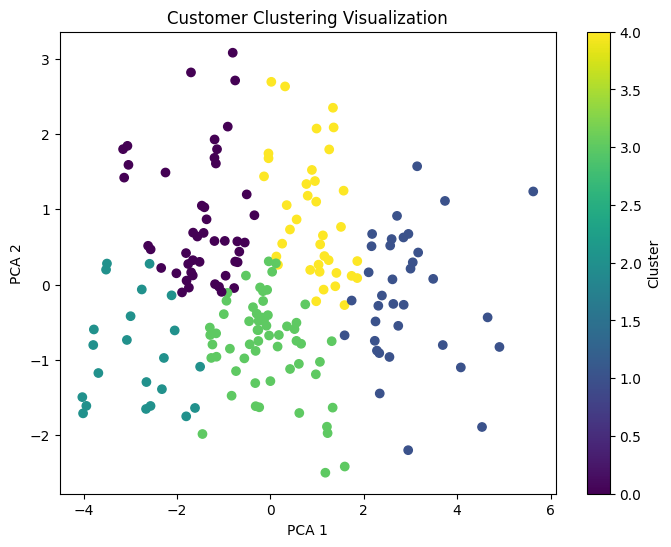

In [ ]:
# 2D plot
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_for_clustering)

pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

pca_df['Cluster'] = customer_profile['Cluster']

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.title('Customer Clustering Visualization')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

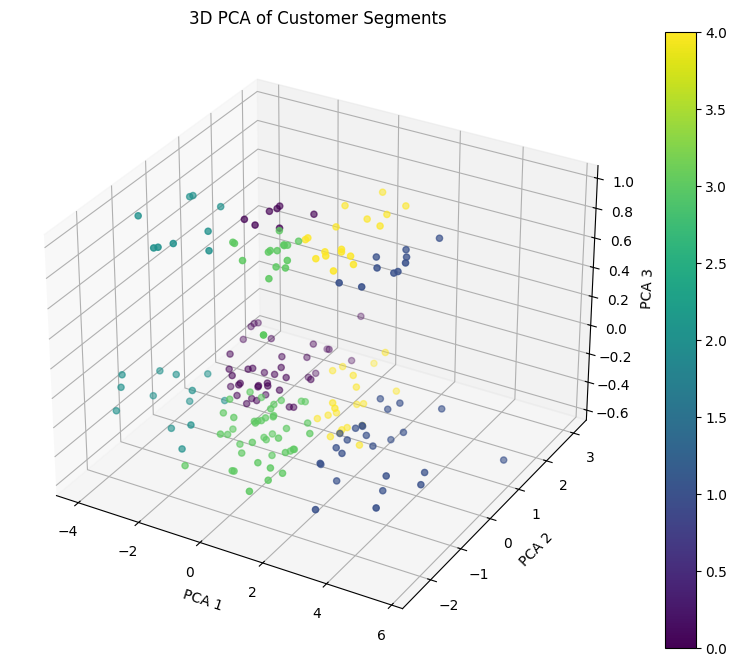

In [198]:
# 3D plot
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_components = pca.fit_transform(features_for_clustering)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_components[:, 0], pca_components[:, 1], pca_components[:, 2], c=customer_profile['Cluster'], cmap='viridis')
ax.set_title('3D PCA of Customer Segments')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
fig.colorbar(scatter)
plt.show()

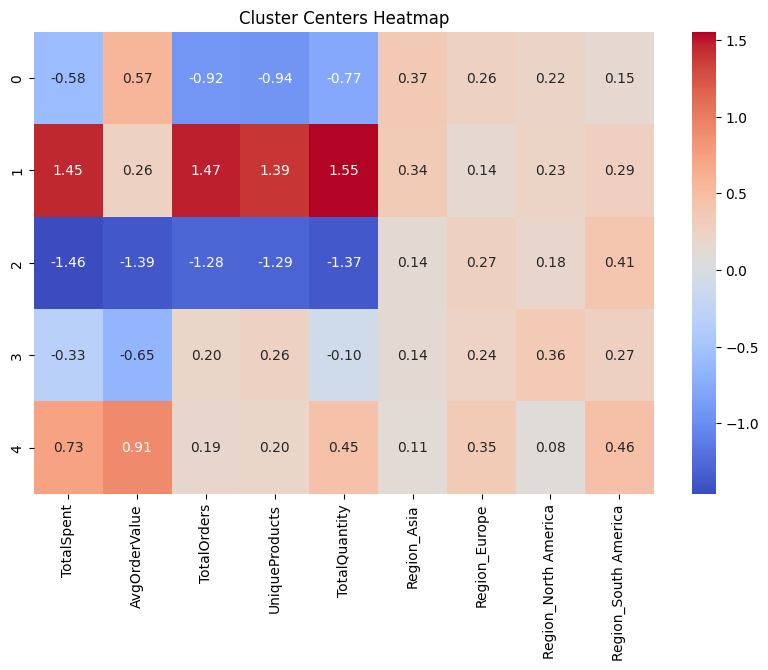

In [205]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Cluster Centers Heatmap')
plt.show()